# A loan prediction system
The Loan Prediction System allows you to apply for loans and receive notifications when they are approved. 

By the data provided by the applicant, the system notifies the applicant of the loan's availability.

A loan prediction machine learning model using Naive Bayes Gaussian Algorithm is a classification model that predicts whether a loan application will be approved or not based on certain input features. The model assumes that the features are independent of each other and follows a Gaussian distribution.

To improve the performance of the model, hyperparameter tuning using Grid search CV is employed. Grid search is a method for searching the best combination of hyperparameters for a machine learning model. The algorithm exhaustively searches through a grid of hyperparameters to find the best combination that maximizes the model's performance.

The hyperparameters for the Naive Bayes Gaussian Algorithm that will be tuned using Grid search CV include:

priors: The prior probabilities of the classes.

var_smoothing: A smoothing parameter that is added to the variance to ensure that it does not become zero.

The model will be trained on a labeled dataset containing loan applications and their respective approvals. The input features will include attributes such as credit score, income, loan amount, employment status, and others.

Once the model has been trained, it can be used to predict the approval status of a loan application with a high degree of accuracy. The performance of the model will be evaluated based on metrics such as accuracy, precision, recall, and F1 score.

Overall, this loan prediction model can be a useful tool for financial institutions to automate the loan approval process and minimize the risk of loan defaults.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Checking Null Values 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

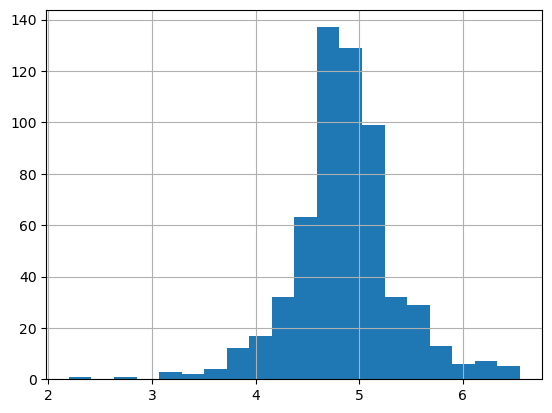

In [6]:
df["loan_amount_log"] = np.log(df["LoanAmount"])
df["loan_amount_log"].hist(bins=20)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loan_amount_log      22
dtype: int64

<AxesSubplot:>

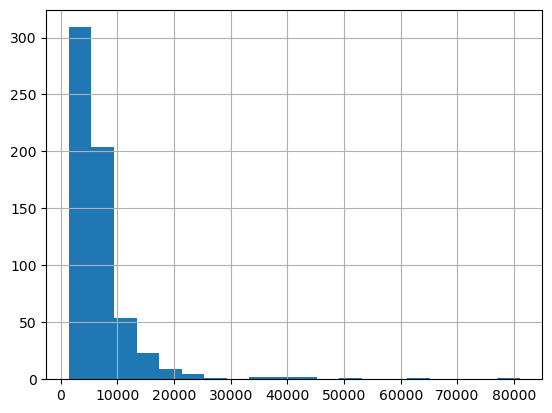

In [8]:
df["TotalIncome"]=df["ApplicantIncome"]+ df["CoapplicantIncome"]
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome"].hist(bins=20)

# Handeling Null Values 

In [9]:
#Filling null values 
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loan_amount_log= df.loan_amount_log.fillna(df.loan_amount_log.mean())

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loan_amount_log      0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Spliting Data X & Y

In [10]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [11]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# Number of Males & Females taken Loan

Number of people who take loan group by gender :- 
Male      502
Female    112
Name: Gender, dtype: int64


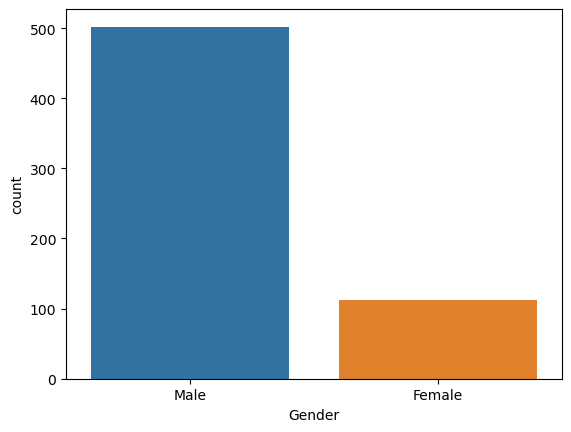

In [34]:
print("Number of people who take loan group by gender :- ")
sns.countplot(x="Gender",data=df)
print(df["Gender"].value_counts())

# Number of Married and Unmarried taken Loan 

Number of People Taken Loan group by Maritial Status:-
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

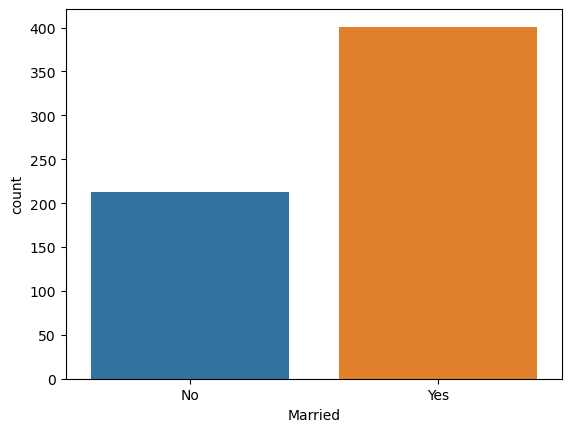

In [13]:
print("Number of People Taken Loan group by Maritial Status:-")
print(df["Married"].value_counts())
sns.countplot(x="Married",data=df)

# Number of Dependents Taken Loan 

Number of People Taken Loan group by Dependents:-
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

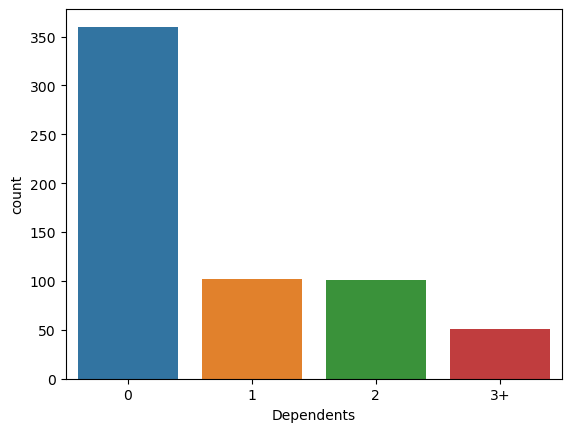

In [14]:
print("Number of People Taken Loan group by Dependents:-")
print(df["Dependents"].value_counts())
sns.countplot(x="Dependents",data=df)

# Number of Self Employed Taken Loan 

Number of People Taken Loan group by Self Employed:-
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

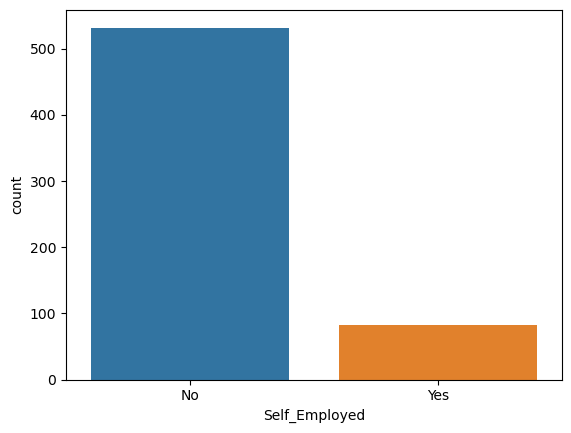

In [15]:
print("Number of People Taken Loan group by Self Employed:-")
print(df["Self_Employed"].value_counts())
sns.countplot(x="Self_Employed",data=df)

Number of People Taken Loan group by Loan Amount:-
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

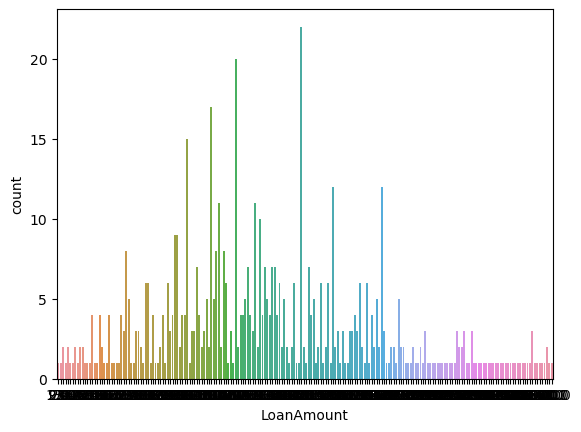

In [16]:
print("Number of People Taken Loan group by Loan Amount:-")
print(df["LoanAmount"].value_counts())
sns.countplot(x="LoanAmount",data=df)

# Number of People taken loan by Credit History 

Number of People Taken Loan group by Credit  History:-
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

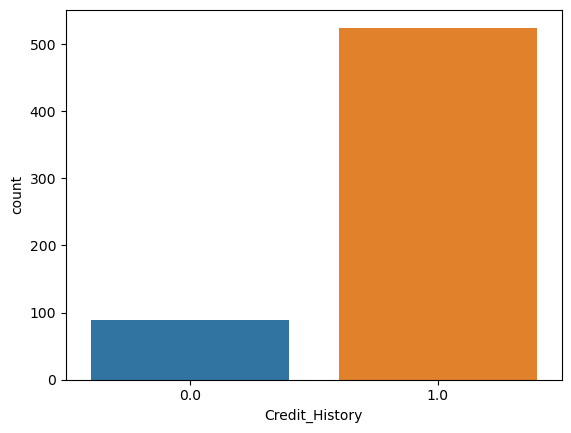

In [17]:
print("Number of People Taken Loan group by Credit  History:-")
print(df["Credit_History"].value_counts())
sns.countplot(x="Credit_History",data=df)

# Spliting data for training and testing model 

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# Encodeing Training Data with Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in range(0,5):
    xtrain[:,i] = LE.fit_transform(xtrain[:,i])
    xtrain[:,7] = LE.fit_transform(xtrain[:,7])
    
xtrain

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [20]:
ytrain = LE.fit_transform(ytrain)
ytrain

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

# Encoding Testing Data with LabelEncoder

In [21]:
for i in range(0,5):
    xtest[:,i] = LE.fit_transform(xtest[:,i])
    xtest[:,7] = LE.fit_transform(xtest[:,7])
xtest

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [22]:
ytest = LE.fit_transform(ytest)
ytest

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# Scaling Data with Standard Scaler 

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

# Creating function for model

In [24]:
def mymodel(model):
    
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    training = model.score(xtrain,ytrain)
    testing = model.score(xtest,ytest)
    print()
    print(classification_report(ypred,ytest))
    print()
    print(f"Training Error of model is {training}")
    print(f"Testing Error of model is {testing}")
    print()
    print(f"The Accuracy is {accuracy_score(ypred,ytest)}")
    return model

# Importing Algorithms 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

# Applying Random Forest Classifier Algorithm 

In [26]:
mymodel(RandomForestClassifier())


              precision    recall  f1-score   support

           0       0.48      0.62      0.54        26
           1       0.89      0.82      0.86        97

    accuracy                           0.78       123
   macro avg       0.69      0.72      0.70       123
weighted avg       0.80      0.78      0.79       123


Training Error of model is 1.0
Testing Error of model is 0.7804878048780488

The Accuracy is 0.7804878048780488


RandomForestClassifier()

# Applying Naive Bayes Gaussian Algorithm

In [27]:
mymodel(GaussianNB())


              precision    recall  f1-score   support

           0       0.42      0.88      0.57        16
           1       0.98      0.82      0.89       107

    accuracy                           0.83       123
   macro avg       0.70      0.85      0.73       123
weighted avg       0.91      0.83      0.85       123


Training Error of model is 0.8044806517311609
Testing Error of model is 0.8292682926829268

The Accuracy is 0.8292682926829268


GaussianNB()

# Applying Decision Tree Classifier Algorithm

In [28]:
mymodel(DecisionTreeClassifier())


              precision    recall  f1-score   support

           0       0.73      0.53      0.62        45
           1       0.77      0.88      0.82        78

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.75      0.76      0.75       123


Training Error of model is 1.0
Testing Error of model is 0.7560975609756098

The Accuracy is 0.7560975609756098


DecisionTreeClassifier()

# Applying K-Neighbors Classifier 

In [29]:
mymodel(KNeighborsClassifier())


              precision    recall  f1-score   support

           0       0.45      0.68      0.55        22
           1       0.92      0.82      0.87       101

    accuracy                           0.80       123
   macro avg       0.69      0.75      0.71       123
weighted avg       0.84      0.80      0.81       123


Training Error of model is 0.8105906313645621
Testing Error of model is 0.7967479674796748

The Accuracy is 0.7967479674796748


KNeighborsClassifier()

# Hyper Parameter Tunning using Grid Search CV

In [33]:
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()
param_grid = {'priors': [None, [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]],
              'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain, ytrain)
print("Best hyperparameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(xtest, ytest)
print("Test set accuracy: ", accuracy)


Best hyperparameters:  {'priors': None, 'var_smoothing': 1e-09}
Test set accuracy:  0.8292682926829268


# Conclusion :- 

# The Best Predicting Model is Naive Bayes Gaussian Algorithm with an Accuracy Rate of 82%.